# Exploring the Android App Market - a Data Mining Analysis of Google Playstore Applications 



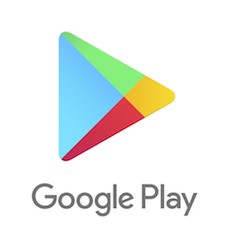

### SENG 474 Fall 2018 Data Mining Project

Cole Boothman St.ID V00808231 <br>
Amy Hanvoravongchai St.ID V00822271 <br>

### Contents

1. Introduction
2. Data Collection 
3. Data Preprocessing and Visualization
4. Data Mining/Analysis of Reviews
5. Conclusions
6. References

### 1. Introduction


Within the past 10 years, the market for mobile applications has grown tremendously. As the technology for smart phones and mobile applications has increased, so has the capabilities and complexity of our mobile applications. Consumers are now able to browse and download millions of applications available onto their phones from the Android and iPhone app stores, choosing from a large variety of applications spanning across social media, video gaming, utility, health technology and many more categories of mobile apps. 

The rapid rise of the mobile application market has increased the demand for software development to be more mobile oriented, from developing new mobile applications to making new web applications and websites user friendly for mobile users. This shift in application development accounts for tld consider he fact that mobile users surpassed the amount of desktop users in 2014 [1], and that in 2017 the estimated global application revenue for mobile applications was expected to be around 77 billion dollars [2].

Given the size and growth of the mobile market, companies who exist or wish to invest in the mobile application market may wish to conduct a thorough economic analysis of existing mobile applications. We can consider questions such as 'What makes an mobile application successful?', 'What do people have to say about mobile applications that are highly rated?' or 'What catergories of mobile applications have the most downloads?' as queries that might help us investigate how mobile applications become well known, acquire high ratings and profitable.

In this project, we analyze two datasets containing information on applications in the Android Google Play Store. The first dataset is the metadata of 10842 applications in the Google Play Store, containing the names, categories, downloads, number of reviews, and other data on each application. We conduct an analysis of the correlation between this metadata and popular applications in the Google Play Store, as well as the correlation for unpopular applications. The second dataset is a set of 64292 app reviews, in which we analyze commonly used words in positive and negative reviews, as well as present a model that can be used for predicting sentiment in app reviews.

### 2. Data Collection


For this project, we used the following dataset from Kaggle.com:

https://www.kaggle.com/lava18/google-play-store-apps

This dataset consists of two csv files, containing details and reviews of applications on the Google Play Store.

`googleplaystore.csv`

This csv file contains metata on 10842 applications in the Google Play Store. For each application, this includes: 

- App Name
- Category
- Number of Reviews
- Size
- Number of Installs
- Type (Free, Paid)
- Price
- Content Rating
- Genres
- Last Updated
- Current Version
- Android Versions supported

As an example, here is the first row in our file:




We will use this dataset to examine the correlations between successful apps and their various metatdata, as well as what makes an application *not* successful.

`googleplaystore_user_reviews.csv`

This csv file contains review details on 64292 apps on the Play Store. For each application, this includes:

- App Name
- Translated Review
- Sentiment
- Sentiment Polarity
- Sentiment Subjectivity

As an exmaple, here is the first row in our file:



We will use thie dataset to examine positive and negative reviews, and examine a model that makes predictions for new reviews based on this dataset.

References:

https://www.business2community.com/mobile-apps/2017-mobile-app-market-statistics-trends-analysis-01750346
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

### 3. Data Preprocessing and Visualization


Let's examine the data and do any preprocessing and cleanup that might be needed.


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('googleplaystore.csv')

print('The total number of applications in this dataset is: {}\n'.format(data.shape[0]))
data.head()


The total number of applications in this dataset is: 10841



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


There's a couple things that we can improve on our dataset for processing.

- Some columns have NaN as values. For example, Categories and Ratings contain this. Let's filter these results.
- Some of the install values have 'Free' and 'Paid' as it's column value, we'll remove these.
- The number of installs include the "+" character. We will remove these so we can use the number of installs as an float.
- The size category has the suffix 'M' for megabytes, and 'k' for some apps that are small. ie. 600kb. We'll remove the k and M letters and divide app sizes in kb by 1000 to convert to Megabytes.
- Remove dollar sign character from prices
- Convert values to string or float values where necessary.

In [2]:
# DATA CLEANING

# Drop any duplicate Apps
data.drop_duplicates(subset='App', inplace=True)
data = data[data['Android Ver'] != np.nan]
data = data[data['Android Ver'] != 'NaN']

# Some values in the 'Installs' column are 'Free'/'Paid'
# This is an error -> remove these columns.
data = data[data['Installs'] != 'Free']
data = data[data['Installs'] != 'Paid']

# Remove the '+' and '-' Characters from the installs column.
data['Installs'] = data['Installs'].str.replace(',', '')
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].astype(int)

# Remove the 'M' for megabytes in size. 
# There are also some apps with kb for size. So we will divide by 1000 to convert to MB.
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = data['Size'].str.replace(',', '')
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

# Remove $ from Price
data['Price'] = data['Price'].str.replace('$', '')

# Change values to float/int
data['Installs'] = data['Installs'].astype(float)
data['Size'] = data['Size'].astype(float)
data['Price'] = data['Price'].astype(float)
data['Reviews'] = data['Reviews'].astype(int)


### Visualization and Data Analytics

Let's graph some pairplots using Python's seaborn library to visualize and compare some of the datasets's attributes, and see if we can infer any patterns that seem to appear in the data.

The attributes we are using for our pairplots are:
- Rating
- Number of Reviews
- Number of Installs
- Size
- Price

Each value will be plotted with the type of application (Free and Paid)


In [3]:
# Display the plots inline with the notebook
%matplotlib inline

import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

from matplotlib import pyplot as plt      

Here are the individual counts for each App Category:

In [4]:
data['Category'].dropna().value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

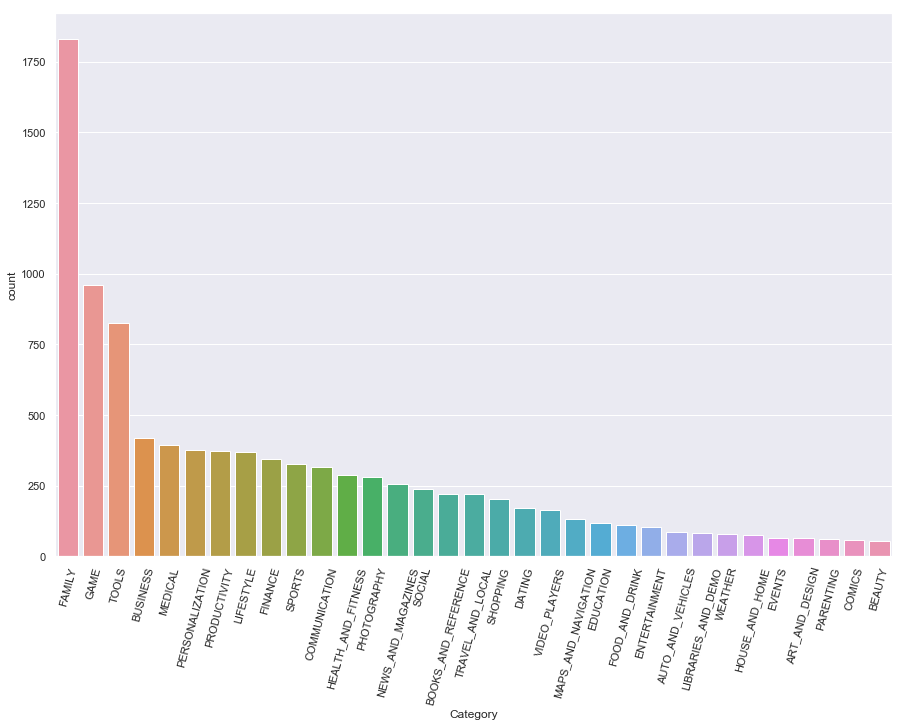

In [5]:
sns.set(rc={'figure.figsize':(15,10)})

categories = data['Category'].dropna()
cat_count = sns.countplot(x = 'Category', data=data, order = data['Category'].value_counts().index)
cat_count.set_title('Count Distribution of Categories')
x_labels = data['Category'].value_counts().keys()

# Need to iterate since get_xticklabels() prints out all the values
for item in cat_count.get_xticklabels():
    item.set_rotation(75)



We can see that the App Categories Family, Game and Tools hold a large share of the Play Store Market apps. Interestingly Buisness and Medical follow up in fourth and fifth place for the number of applications in their respective category. Perhaps the relatively big share of buisness and medical applications points to a trend in more enterprise applications being ported to mobile? Note that Medical is a separate category from Lifestyle, and Health and Fitness as well.

Categories have genres as well. What does the genre distribution look like?

In [31]:
data['Genres'].value_counts()

Tools                                  826
Entertainment                          561
Education                              510
Business                               420
Medical                                395
Personalization                        376
Productivity                           374
Lifestyle                              368
Finance                                345
Sports                                 331
Communication                          315
Action                                 299
Health & Fitness                       288
Photography                            281
News & Magazines                       254
Social                                 239
Books & Reference                      222
Travel & Local                         218
Shopping                               202
Simulation                             193
Arcade                                 184
Dating                                 171
Casual                                 165
Video Playe

Upon immediate inspection, it looks like some of the 'Genres' have the same label as some categories.
In addition, there are a lot of genres in which only one or a few apps fall into that genre. 


Now let's take a look at the rating distrbution for all applications in our dataset.


Average Rating across all applications: 4.173243045387994

Median Rating across all applications: 4.3


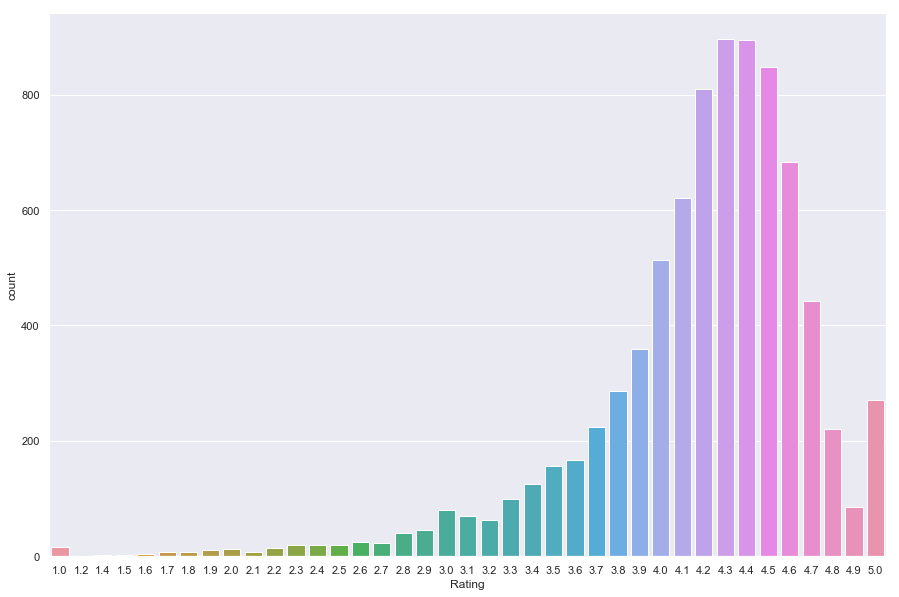

In [6]:
app_rating_dist = sns.countplot(x = 'Rating', data=data)
app_rating_dist.set_title('Rating Distribution across Apps')
print('\nAverage Rating across all applications: {}'.format(data['Rating'].mean()))
print('\nMedian Rating across all applications: {}'.format(data['Rating'].median()))

Somewhat surprisingly, we see that a lot of applications have a very high average rating in the app store. (When the Google Play Store shows a rating for an application, it is the average of all ratings given for that app) A large majority of applications have ratings greater than 4 stars - From above, we can see that on average, an application has a rating of about 4.1, and the median rating was 4.3. 

Let's cross check these ratings against the top 10 categories, to see the rating distribution for popular categories.



  Average Rating for Category: FAMILY is 4.179664179104478
  Median Rating for Category: FAMILY is 4.3

  Average Rating for Category: GAME is 4.247368421052632
  Median Rating for Category: GAME is 4.3

  Average Rating for Category: TOOLS is 4.039554317548746
  Median Rating for Category: TOOLS is 4.2

  Average Rating for Category: BUSINESS is 4.098479087452472
  Median Rating for Category: BUSINESS is 4.2

  Average Rating for Category: MEDICAL is 4.166551724137932
  Median Rating for Category: MEDICAL is 4.3

  Average Rating for Category: PERSONALIZATION is 4.332214765100671
  Median Rating for Category: PERSONALIZATION is 4.4

  Average Rating for Category: PRODUCTIVITY is 4.183388704318936
  Median Rating for Category: PRODUCTIVITY is 4.3

  Average Rating for Category: LIFESTYLE is 4.093355481727575
  Median Rating for Category: LIFESTYLE is 4.2

  Average Rating for Category: FINANCE is 4.115562913907285
  Median Rating for Category: FINANCE is 4.3

  Average Rating for Categ

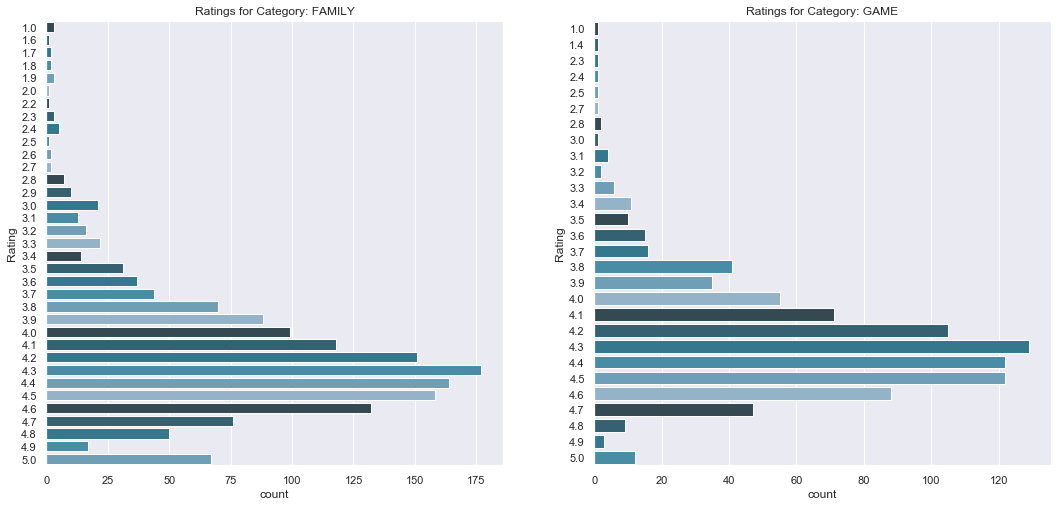

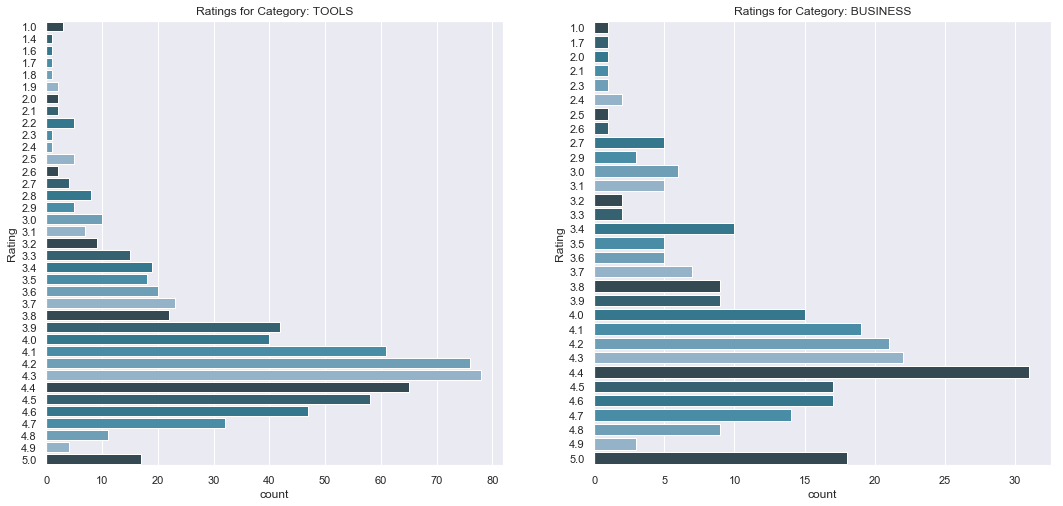

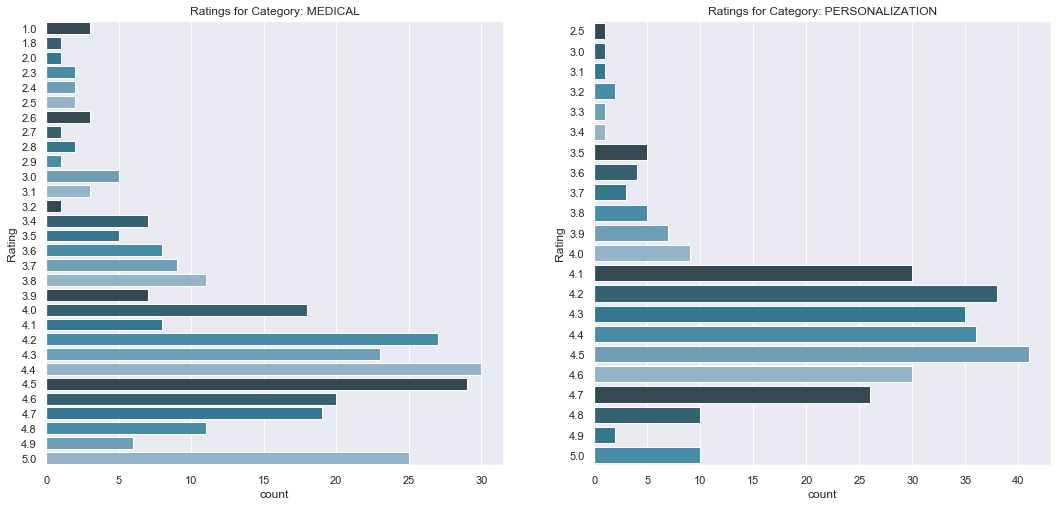

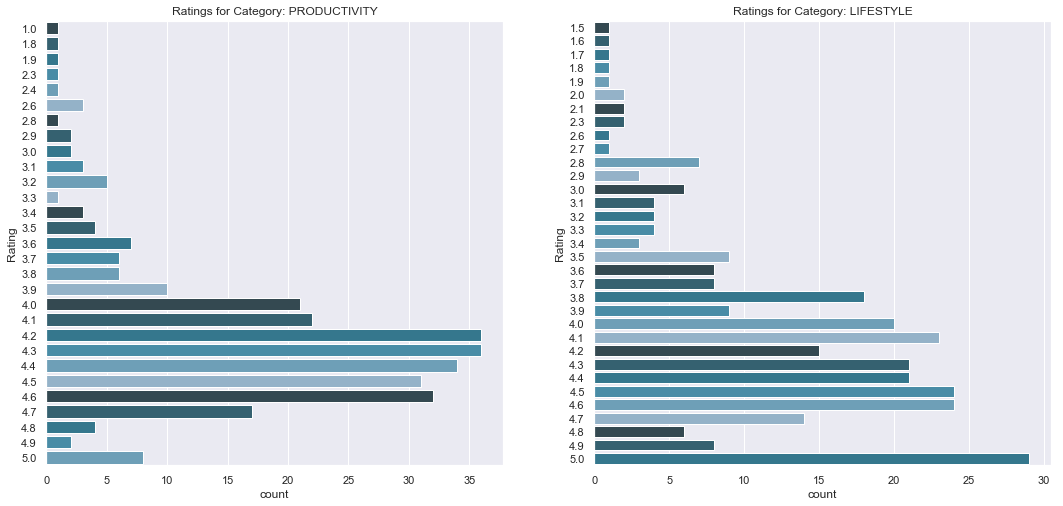

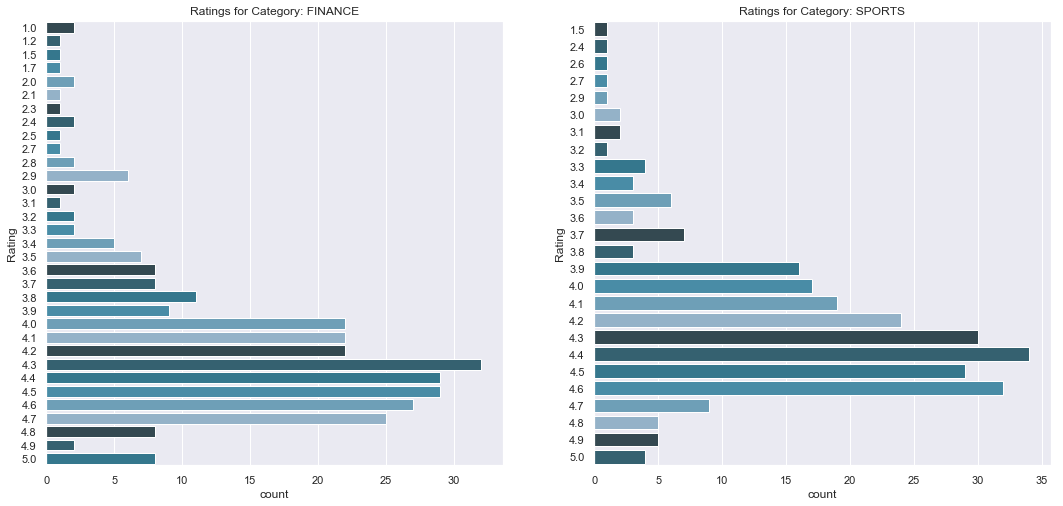

In [7]:
sns.set(rc={'figure.figsize':(18,18)})
top_10 = data['Category'].value_counts().keys()

i=0
j=1
for k in range(0,5):
    fig = plt.figure()
    # Two figures per row
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax1.set_title('Ratings for Category: {}'.format(top_10[i]))
    ax2.set_title('Ratings for Category: {}'.format(top_10[j]))
    
    cat1= data[data.Category == top_10[i]]
    cat2= data[data.Category == top_10[j]]
    sns.countplot(y = 'Rating', ax=ax1, data=cat1, palette=sns.color_palette("PuBuGn_d"))
    sns.countplot(y = 'Rating', ax=ax2, data=cat2, palette=sns.color_palette("PuBuGn_d"))
    i = i+2
    j = i+1

for m in range(0,10):
    cat = data[data.Category == top_10[m]]['Rating']
    print('  Average Rating for Category: {} is {}'.format(top_10[m], cat.mean()))
    print('  Median Rating for Category: {} is {}\n'.format(top_10[m], cat.median()))




   

We can see that the average rating for each category is pretty similar (Around ~4 stars), but that the ratings for each category do vary a bit. Notice that the category "Lifestyle" has the highest number of 5 star ratings!

Now let's take a look at price and size distribution.

## How are Price and Size distributed?

Number of free and paid applications:
 Free    8902
Paid     756
Name: Type, dtype: int64

Average App Price: 1.0992990992856404
Median App Price: 0.0

Average App Size: 20.39528931451613
Median App Size: 12.0



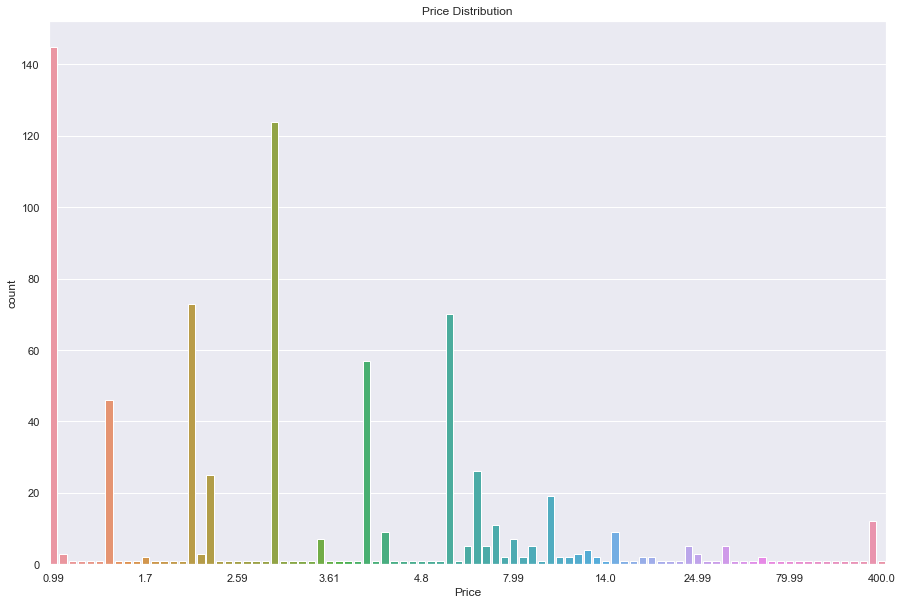

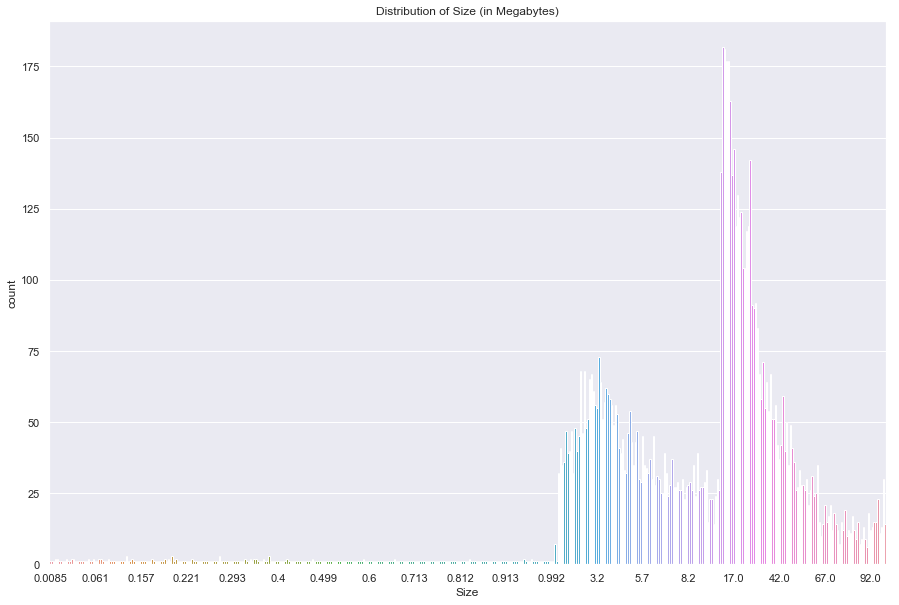

In [8]:
sns.set(rc={'figure.figsize':(15,10)})
price_plot = sns.countplot(x = 'Price', data=data[data.Price>0])
price_plot.set_title('Price Distribution for Paid Applications')

for ind, label in enumerate(price_plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.figure()
size_plot = sns.countplot(x = 'Size', data=data)
size_plot.set_title('Distribution of Size (in Megabytes)')
for ind, label in enumerate(size_plot.get_xticklabels()):
    if ind % 25 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

print('Number of free and paid applications:\n {}'.format(data['Type'].value_counts()))

print('\nAverage App Price: {}'.format(data['Price'].mean()))
print('Median App Price: {}\n'.format(data['Price'].median()))

print('Average App Size: {}'.format(data['Size'].mean()))
print('Median App Size: {}\n'.format(data['Size'].median()))


A large majority of the applications are free - Here we are only plotting the paid application prices.

Note: Both of the Price/Size X axis are not to scale - due to so many different price/size points we decided to only keep a few of the labels.

There are a small amount of applications that cost a fair bit of money - what kind of applications are they?

## What kind of applications are expensive?

In [9]:
data[['App', 'Category', 'Price']][data.Price >= 200]

,App,Category,Price
4197,most expensive app (H),FAMILY,399.99
4362,💎 I'm rich,LIFESTYLE,399.99
4367,I'm Rich - Trump Edition,LIFESTYLE,400.00
5351,I am rich,LIFESTYLE,399.99
5354,I am Rich Plus,FAMILY,399.99
5355,I am rich VIP,LIFESTYLE,299.99
5356,I Am Rich Premium,FINANCE,399.99
5357,I am extremely Rich,LIFESTYLE,379.99
5358,I am Rich!,FINANCE,399.99
5359,I am rich(premium),FINANCE,399.99


An example of one of these applications in the Google Store Menu:

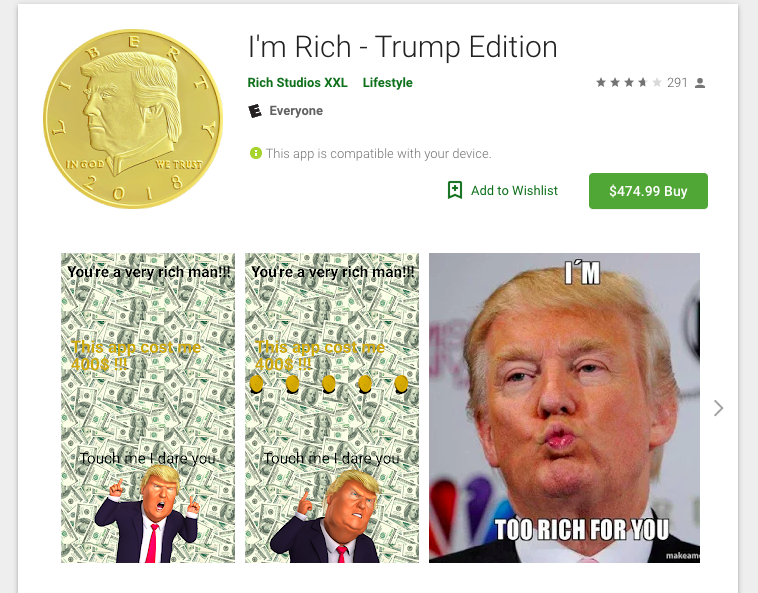

Seems like these applications are a bit silly and just for showing off.


## How does Price affect Rating?

Ratings for Paid Applications


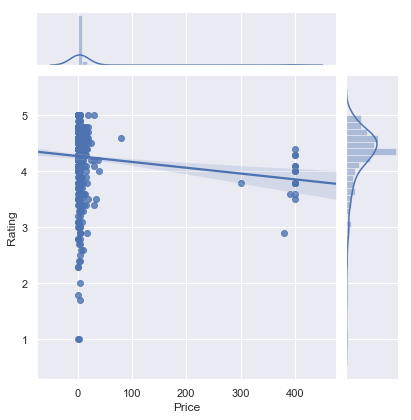

In [24]:
sns.set(rc={'figure.figsize':(15,10)})
# Here we only want to look at paid applications.
rating_plot = sns.jointplot('Price', 'Rating', data[data.Price > 0], kind="reg")
print("Ratings for Paid Applications")


We can see that most paid applications have a high rating,
and not surprisingly, some of the most expensive applications also have high ratings. 
(Who would pay that much money for a junk application and rate it bad?)


## How does size affect rating?

Rating according to Size of Application


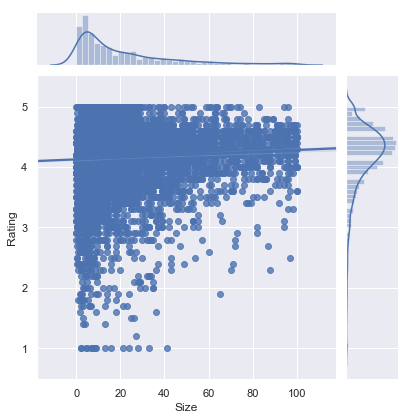

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
# Here we only want to look at paid applications.
print('Rating according to Size of Application')
size_rating_plot = sns.jointplot('Size', 'Rating', data, kind="reg")

It looks like as the size of the application increases, the number of low ratings decreases. 

## Pairplots for Free/Paid applications using Rating, Reviews, Size, Installs and Price

Lastly, let's plot the distribution of Free apps versus Paid apps using these attributes.

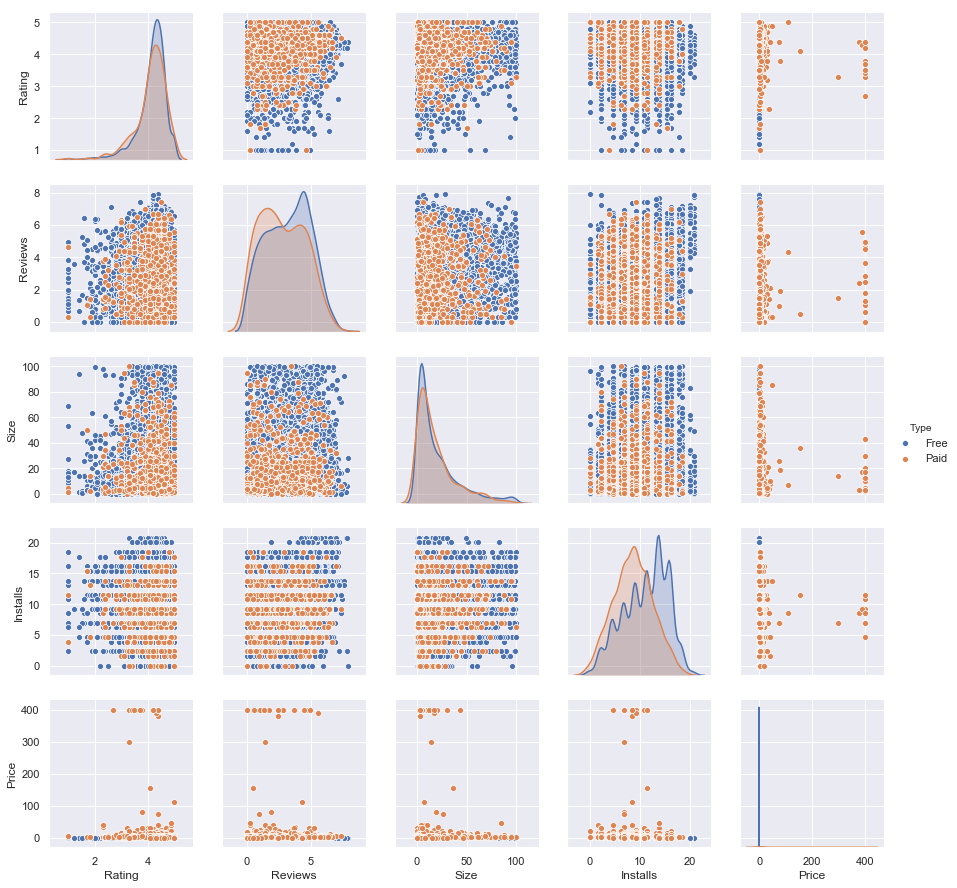

In [42]:
# Please note: Code here is referenced from the link below.
# https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market

ratings = data['Rating'].dropna()
size = data['Size'].dropna()
installs = data['Installs'][data.Installs!=0].dropna()
reviews = data['Reviews'][data.Reviews!=0].dropna()
t = data['Type'].dropna()
price = data['Price']

pairplot_data = list(zip(ratings, np.log10(reviews), size, np.log(installs), t, price))
pairplot_data = pd.DataFrame(pairplot_data, columns=['Rating','Reviews', 'Size', 'Installs', 'Type', 'Price'])
sns.pairplot(pairplot_data, hue='Type')

Now that we've done some data exploration and visualization 
for some important attributes that could help deteremine what makes an app successful, let's take a look at our reviews dataset.